In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("salesways.csv")
#Checking for the first 5 of the Dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Ckecking for the last 5 of the Dataset
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [4]:
#The Columns in the Dataset
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
#The information of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
#From the below we can see that the Item_Weight has 1463 miss values
#and Outlet_Size has 2410 missing values:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

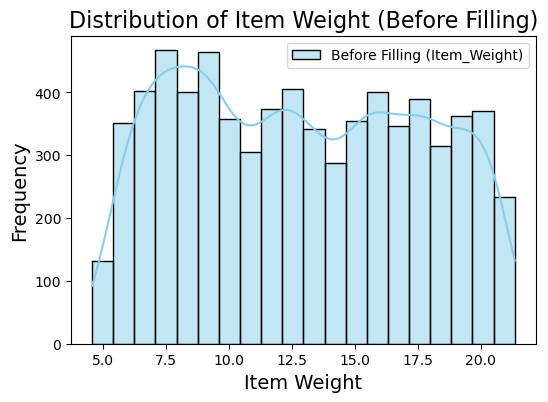

In [8]:
# Before filling missing values for Item_Weight
plt.figure(figsize=(6, 4))
sns.histplot(df["Item_Weight"].dropna(), kde=True, color='skyblue', label='Before Filling (Item_Weight)')
plt.xlabel('Item Weight', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Item Weight (Before Filling)', fontsize=16)
plt.legend()
plt.show()


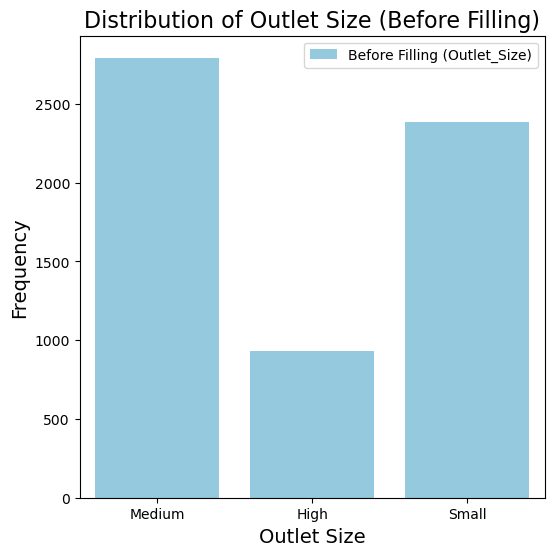

In [9]:
# Before filling missing values for Outlet_Size
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Outlet_Size', color='skyblue', label='Before Filling (Outlet_Size)')
plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Outlet Size (Before Filling)', fontsize=16)
plt.legend()
plt.show()



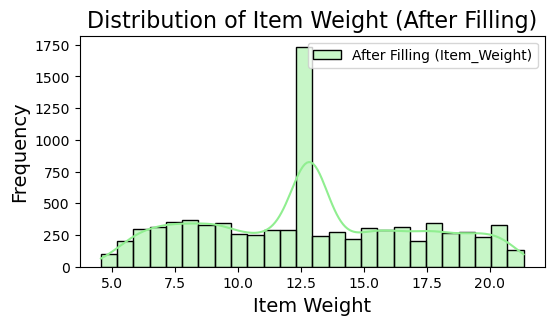

In [10]:
# Fill missing values for both columns
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace=True)
mode_outlet_size = df["Outlet_Size"].mode()[0]
df["Outlet_Size"].fillna(mode_outlet_size, inplace=True)
# After filling missing values for Item_Weight
plt.figure(figsize=(6, 3))
sns.histplot(df["Item_Weight"], kde=True, color='lightgreen', label='After Filling (Item_Weight)')
plt.xlabel('Item Weight', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Item Weight (After Filling)', fontsize=16)
plt.legend()
plt.show()



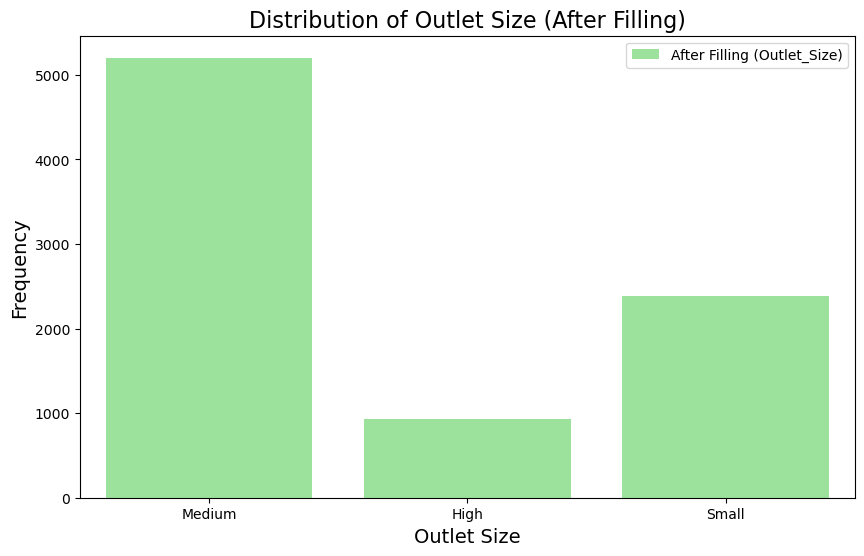

In [11]:
# After filling missing values for Outlet_Size
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Outlet_Size', color='lightgreen', label='After Filling (Outlet_Size)')
plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Outlet Size (After Filling)', fontsize=16)
plt.legend()
plt.show()

In [12]:
#checking out the outlet size
df["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [13]:
df["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

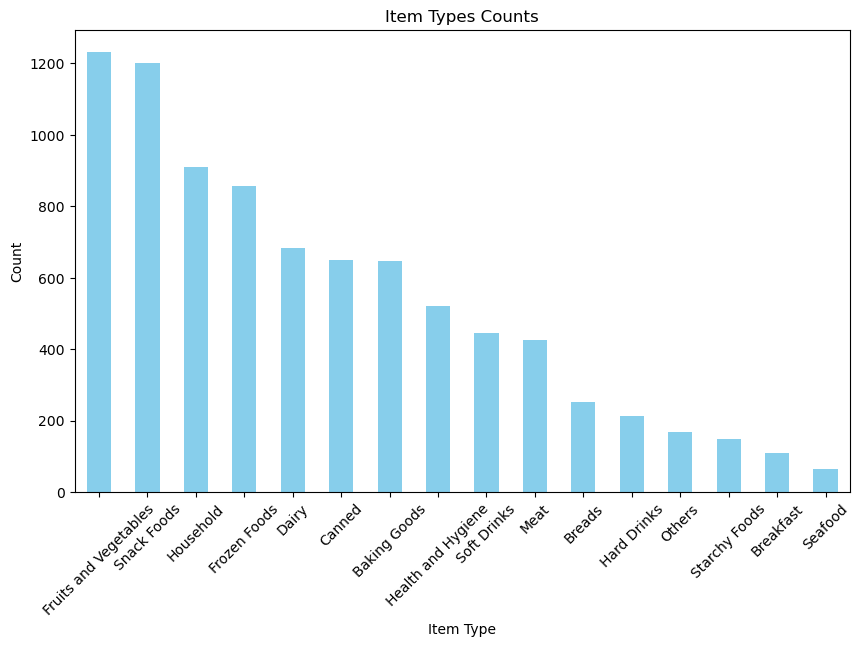

In [14]:
item_counts = df["Item_Type"].value_counts()

plt.figure(figsize=(10,6))
item_counts.plot(kind='bar', color = "skyblue")
plt.title('Item Types Counts')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

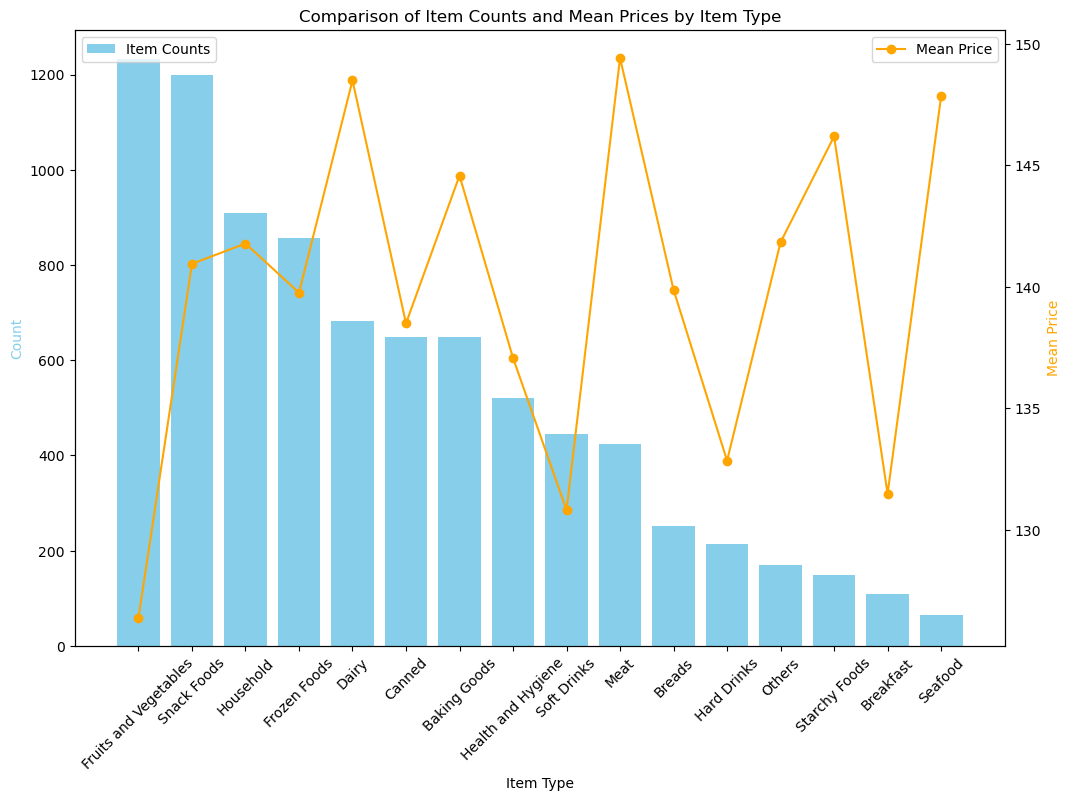

In [15]:
# Calculate item counts and mean price
item_counts = df["Item_Type"].value_counts()
mean_prices = df.groupby("Item_Type")["Item_MRP"].mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar for counts
ax1.bar(item_counts.index, item_counts.values, color='skyblue', label='Item Counts')

# Creating a secondary y-axis for mean price
ax2 = ax1.twinx()
ax2.plot(mean_prices.index, mean_prices.values, color='orange', marker='o', label='Mean Price')

# Formatting
ax1.set_xlabel('Item Type')
ax1.set_ylabel('Count', color='skyblue')
ax2.set_ylabel('Mean Price', color='orange')
ax1.set_title('Comparison of Item Counts and Mean Prices by Item Type')
ax1.set_xticks(range(len(item_counts)))  # Set tick positions
ax1.set_xticklabels(item_counts.index, rotation=45)  # Set tick labels

ax1.legend(loc='upper left')
ax2.legend(loc='upper right');

plt.show()

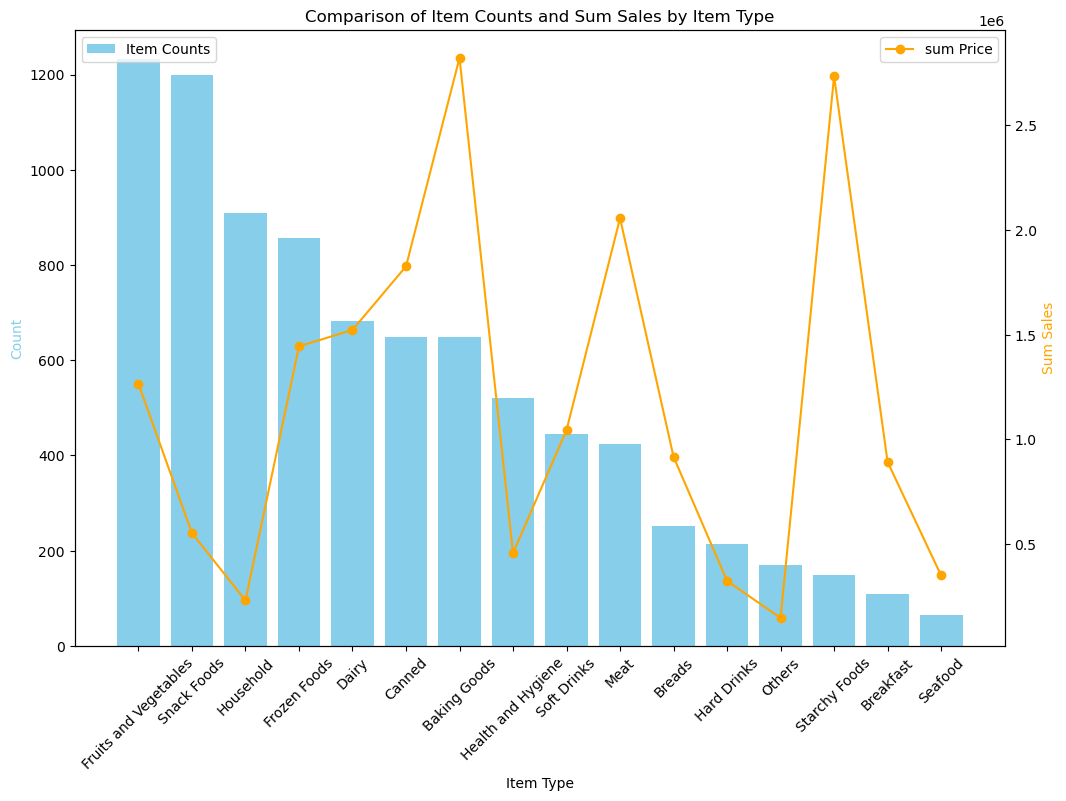

In [16]:
# Calculate item counts and mean price
item_counts = df["Item_Type"].value_counts()
sum_sales = df.groupby("Item_Type")["Item_Outlet_Sales"].sum()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar for counts
ax1.bar(item_counts.index, item_counts.values, color='skyblue', label='Item Counts')

# Creating a secondary y-axis for mean price
ax2 = ax1.twinx()
ax2.plot(sum_sales.index, sum_sales.values, color='orange', marker='o', label='sum Price')

# Formatting
ax1.set_xlabel('Item Type')
ax1.set_ylabel('Count', color='skyblue')
ax2.set_ylabel('Sum Sales', color='orange')
ax1.set_title('Comparison of Item Counts and Sum Sales by Item Type')
ax1.set_xticks(range(len(item_counts)))  # Set tick positions
ax1.set_xticklabels(item_counts.index, rotation=45)  # Set tick labels

ax1.legend(loc='upper left')
ax2.legend(loc='upper right');

plt.show()

In [17]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

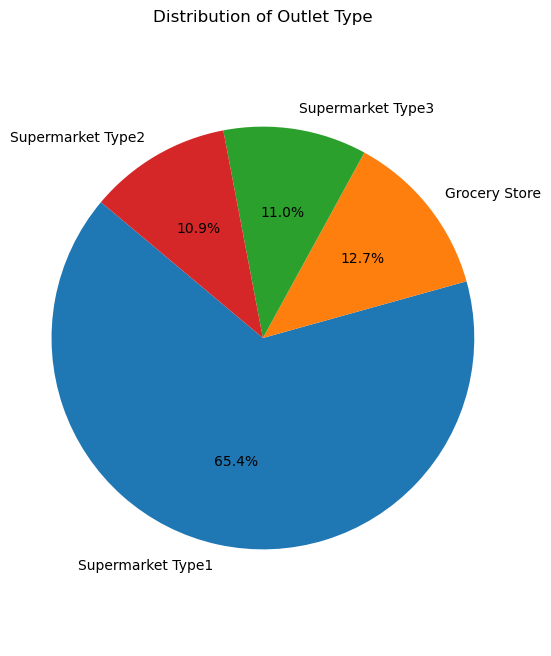

In [18]:
# Data
outlet_type_counts = [5577, 1083, 935, 928]  # Count of each outlet type
outlet_types = ['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2']

# Create a pie chart
plt.figure(figsize=(6, 8))
plt.pie(outlet_type_counts, labels=outlet_types, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Outlet Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


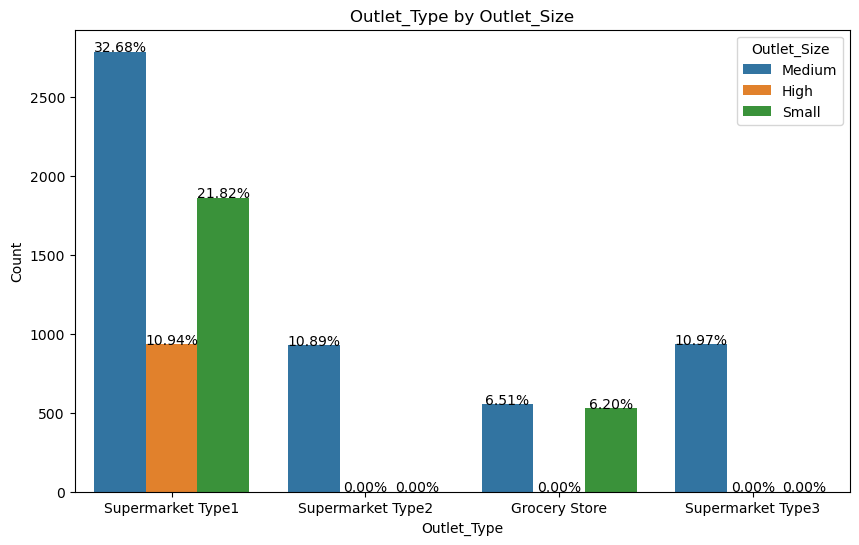

In [19]:
# Create countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x= "Outlet_Type", hue="Outlet_Size", data=df)

# Add percentages on top of each bar
total = len(df)  # total number of observations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height/total:.2%}', ha="center")

# Set plot title, labels, and show the plot
plt.title('Outlet_Type by Outlet_Size')
plt.xlabel('Outlet_Type')
plt.ylabel('Count')
plt.show()

In [20]:
unique_sizes = df["Outlet_Size"].dropna().unique()
print(unique_sizes)

['Medium' 'High' 'Small']


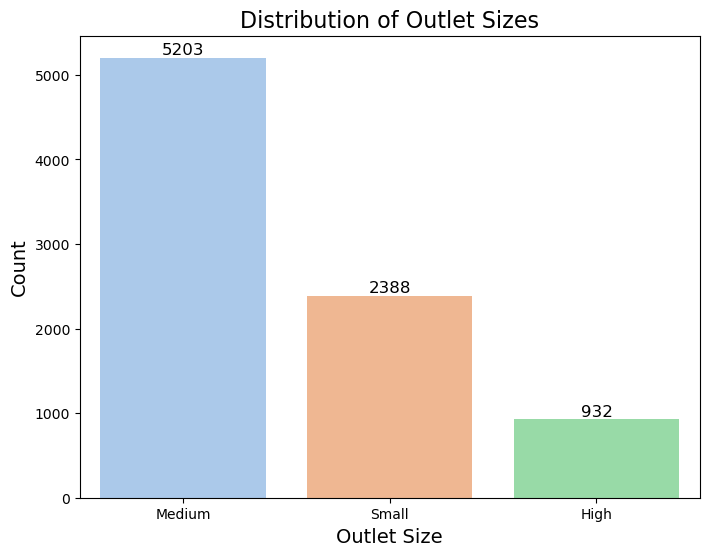

In [21]:
# Count the occurrences of each outlet size
size_counts = df["Outlet_Size"].dropna().value_counts()

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Create the bar plot
sns.barplot(x=size_counts.index, y=size_counts, palette='pastel')

# Annotate the bars with the counts
for i, count in enumerate(size_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Outlet Sizes', fontsize=16)

# Show the plot
plt.show()

In [22]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [23]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

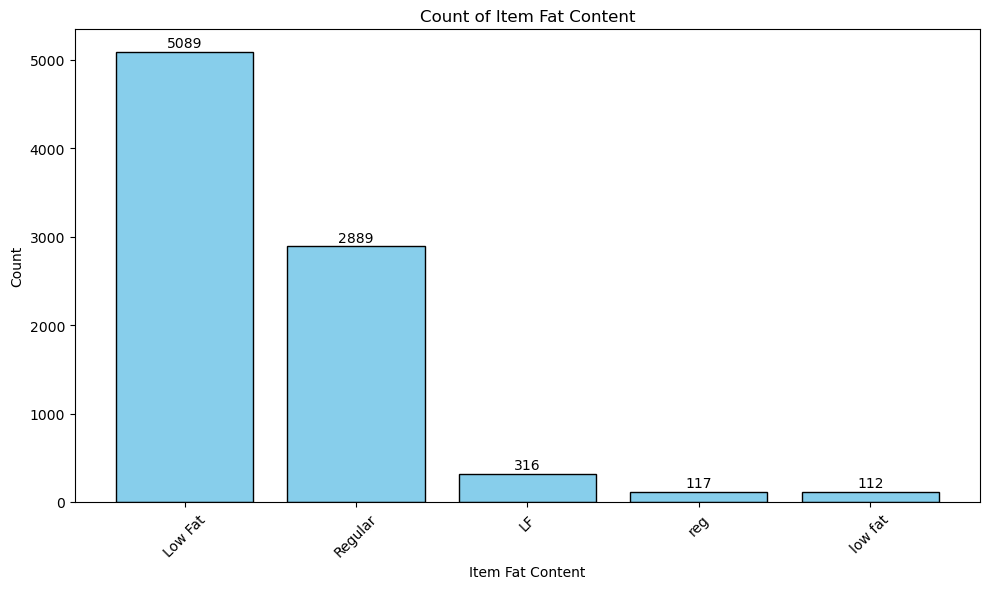

In [24]:
# Data
Item_Fat_Content_counts = [5089, 2889, 316, 117, 112]  # Count of each Item_Fat_Content
Item_Fat_Content = ['Low Fat', 'Regular', 'LF', 'reg', 'low fat']

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(Item_Fat_Content, Item_Fat_Content_counts, color='skyblue', edgecolor='black')

# Add count figures on top of each bar
for bar, count in zip(bars, Item_Fat_Content_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20, count, ha='center', va='bottom')

plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.title('Count of Item Fat Content')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

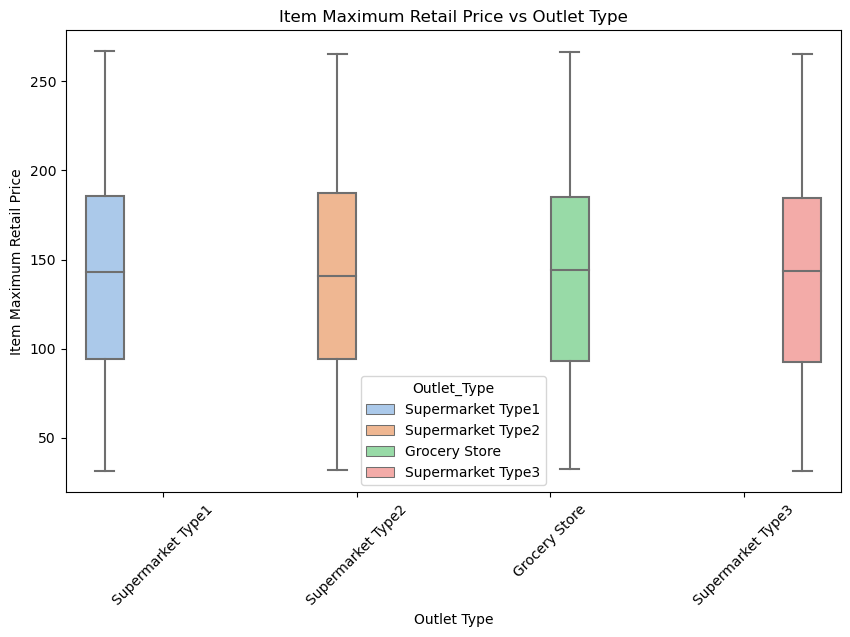

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Outlet_Type", y="Item_MRP",hue="Outlet_Type",palette="pastel", data=df)
plt.title("Item Maximum Retail Price vs Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Item Maximum Retail Price")
plt.xticks(rotation=45)
plt.show();

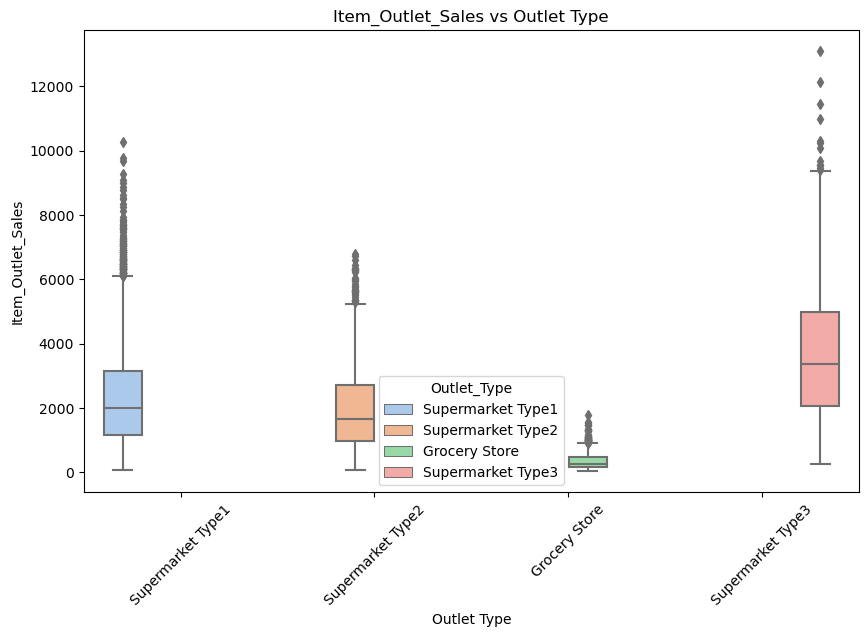

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales",hue="Outlet_Type",palette="pastel", data=df)
plt.title("Item_Outlet_Sales vs Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Item_Outlet_Sales")
plt.xticks(rotation=45)
plt.show();

In [27]:
df["Item_Outlet_Sales"].quantile([0.01, 0.9])

0.01      83.8908
0.90    4570.0512
Name: Item_Outlet_Sales, dtype: float64

In [28]:
low , high = df["Item_Outlet_Sales"].quantile([0.01, 0.9])
mask_Item_Outlet_Sales = df["Item_Outlet_Sales"].between(low, high)
df = df[mask_Item_Outlet_Sales]

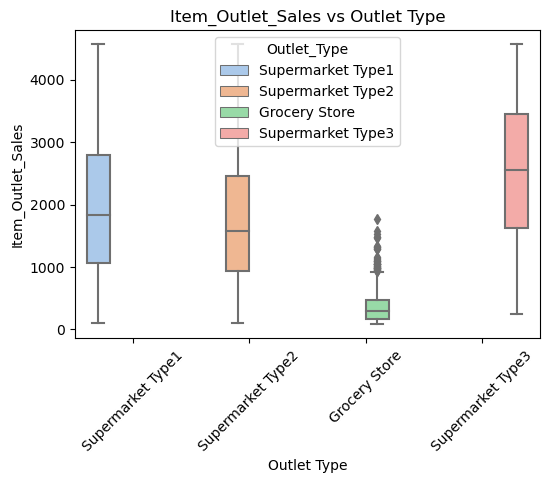

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales",hue="Outlet_Type",palette="pastel", data=df)
plt.title("Item_Outlet_Sales vs Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Item_Outlet_Sales")
plt.xticks(rotation=45)
plt.show();

In [30]:
df["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 1997, 2004, 2007], dtype=int64)

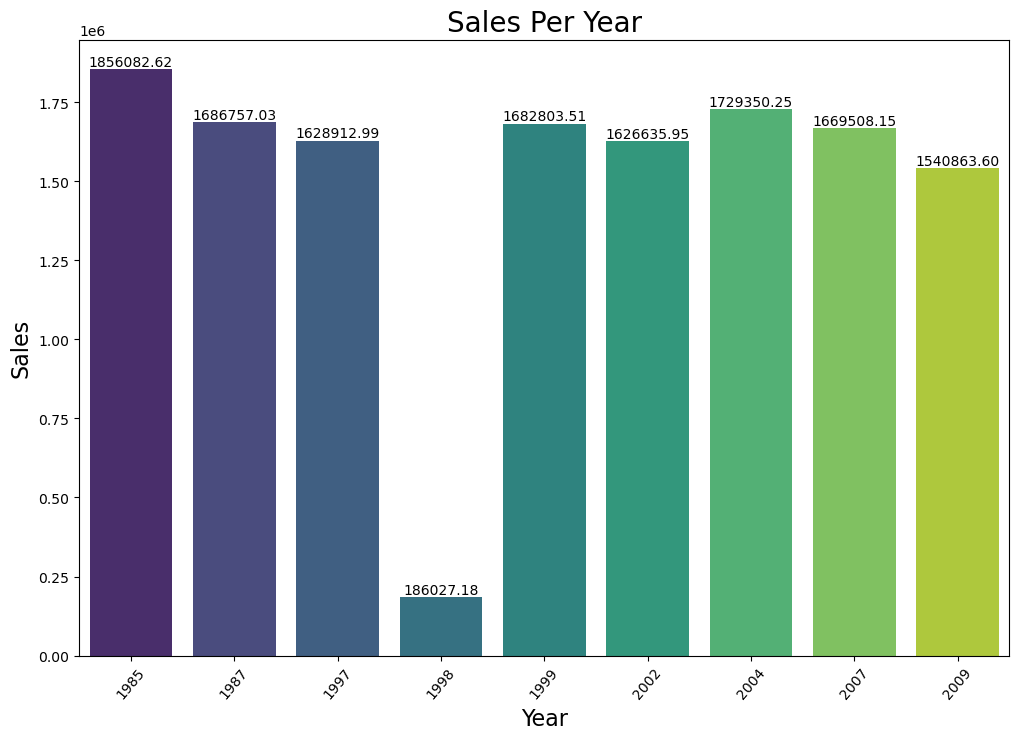

In [31]:
# Group by Outlet Establishment Year and sum the Item_Outlet_Sales
sales_per_year = df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()

# Convert the index to integers
years = sales_per_year.index.astype(int)

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = sns.barplot(x=years, y=sales_per_year, palette='viridis')

# Annotate bars with sales values
for i, sales in enumerate(sales_per_year):
    ax.text(i, sales, f'{sales:.2f}', ha='center', va='bottom', fontsize=10)

# Set labels and title
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Sales', fontsize=16)
ax.set_title('Sales Per Year', fontsize=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=50)

# Show the plot
plt.show()

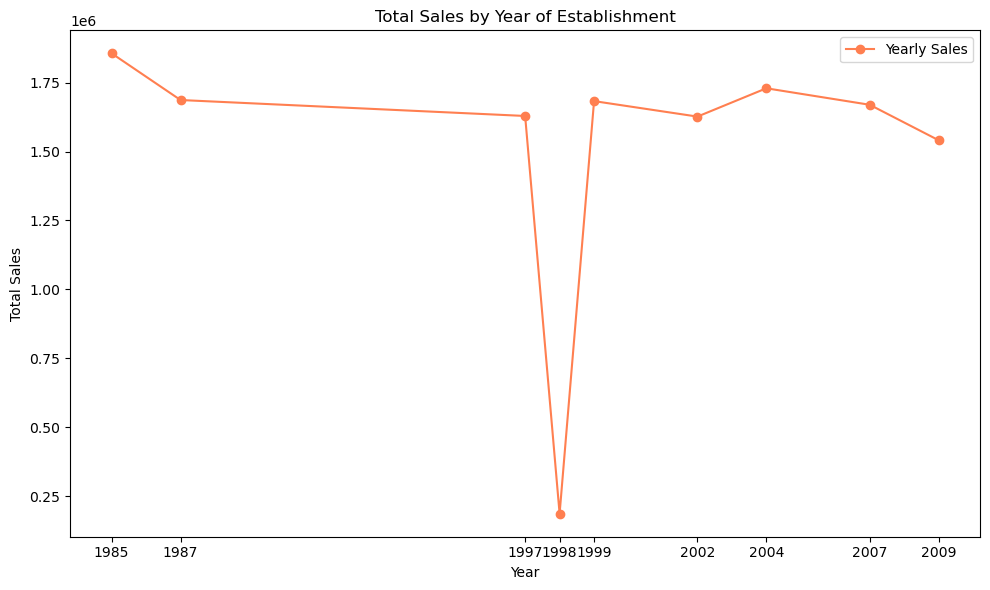

In [32]:
# Since 'Outlet_Establishment_Year' is not a datetime column, directly access the values
df['Year'] = df["Outlet_Establishment_Year"]

# Group data by year and calculate total sales
Year_sales = df.groupby('Year')['Item_Outlet_Sales'].sum()

# Create a list of year names as strings
Year_names = Year_sales.index.to_list()  # Convert index to a list

# Create a line chart
plt.figure(figsize=(10, 6))
Year_sales.plot(marker='o', linestyle='-', color='coral', label='Yearly Sales')
plt.xticks(Year_sales.index)  # Set x-axis ticks based on year indices
plt.xlabel('Year')  # Update label to reflect the actual column name
plt.ylabel('Total Sales')
plt.title('Total Sales by Year of Establishment')
plt.legend()  # Add legend to identify the line
plt.tight_layout()
plt.show()

In [33]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

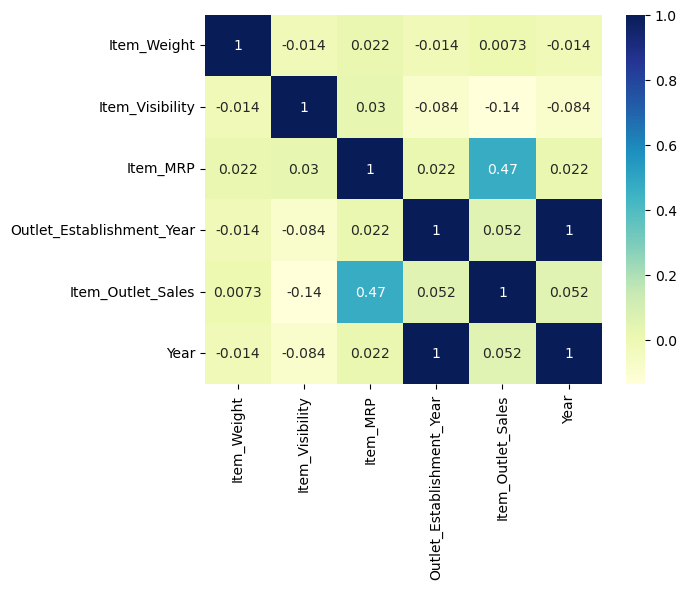

In [35]:
#graphical representation
corr = df.select_dtypes("number").corr()
sns.heatmap(corr,cmap='YlGnBu', annot = True);

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7587 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7587 non-null   float64
 1   Item_Fat_Content           7587 non-null   object 
 2   Item_Visibility            7587 non-null   float64
 3   Item_Type                  7587 non-null   object 
 4   Item_MRP                   7587 non-null   float64
 5   Outlet_Establishment_Year  7587 non-null   int64  
 6   Outlet_Size                7587 non-null   object 
 7   Outlet_Location_Type       7587 non-null   object 
 8   Outlet_Type                7587 non-null   object 
 9   Item_Outlet_Sales          7587 non-null   float64
 10  Year                       7587 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 711.3+ KB


In [37]:
# Checking the number of unique values is the categorical features
columns_unique_value = ['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year','Item_Outlet_Sales','Year']

for column in columns_unique_value:
    unique_values_count = df[column].nunique()
    print(f"The '{column}' column number of unique values are: {unique_values_count}")
    print("____________________________________________________________________")

The 'Item_Visibility' column number of unique values are: 7032
____________________________________________________________________
The 'Item_MRP' column number of unique values are: 5443
____________________________________________________________________
The 'Outlet_Establishment_Year' column number of unique values are: 9
____________________________________________________________________
The 'Item_Outlet_Sales' column number of unique values are: 2815
____________________________________________________________________
The 'Year' column number of unique values are: 9
____________________________________________________________________


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

In [39]:
df_encode = pd.get_dummies(data = df, prefix= "OHE", prefix_sep= "_", drop_first= True, dtype= "int8")

In [40]:
df_encode

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Year,OHE_Low Fat,OHE_Regular,OHE_low fat,OHE_reg,...,OHE_Snack Foods,OHE_Soft Drinks,OHE_Starchy Foods,OHE_Medium,OHE_Small,OHE_Tier 2,OHE_Tier 3,OHE_Supermarket Type1,OHE_Supermarket Type2,OHE_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,1999,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,2009,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,1999,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,1998,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,1987,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,1987,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,2002,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,2004,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,2009,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0


In [41]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7587 entries, 0 to 8522
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7587 non-null   float64
 1   Item_Visibility            7587 non-null   float64
 2   Item_MRP                   7587 non-null   float64
 3   Outlet_Establishment_Year  7587 non-null   int64  
 4   Item_Outlet_Sales          7587 non-null   float64
 5   Year                       7587 non-null   int64  
 6   OHE_Low Fat                7587 non-null   int8   
 7   OHE_Regular                7587 non-null   int8   
 8   OHE_low fat                7587 non-null   int8   
 9   OHE_reg                    7587 non-null   int8   
 10  OHE_Breads                 7587 non-null   int8   
 11  OHE_Breakfast              7587 non-null   int8   
 12  OHE_Canned                 7587 non-null   int8   
 13  OHE_Dairy                  7587 non-null   int8   
 1

In [43]:
# define features and target:
x = df_encode.drop("Item_Outlet_Sales", axis=1) # Features
y = df_encode["Item_Outlet_Sales"]  # Target

In [44]:
#spliting the tain and the test data
X_train,X_test,y_train,y_test = train_test_split(x, y,shuffle=True,test_size  = 0.20,random_state = 0)

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Create Regression
knn_regressor = KNeighborsRegressor(n_neighbors=3)
LR_regressor = LinearRegression()
ridge_regressor = Ridge(alpha=0.9)

In [47]:
ridge_regressor.fit(X_train, y_train)
y_pred =ridge_regressor.predict(X_test)
mse_r = mean_absolute_error(y_test, y_pred)

In [48]:
LR_regressor.fit(X_train, y_train)
y_pred = LR_regressor.predict(X_test)
mse_lr = mean_absolute_error(y_test, y_pred)

In [49]:
knn_regressor.fit(X_train, y_train)
predictions = knn_regressor.predict(X_test)
mse_knn = mean_absolute_error(y_test, y_pred)


In [50]:
print("The  Mean absolute Error Linear Regression is:", mse_lr)
print("The  Mean absolute Error knn Regression  is:", mse_knn)
print("The Mean absolute Error  Ridge Regression  is:", mse_r)

The  Mean absolute Error Linear Regression is: 627.288126510582
The  Mean absolute Error knn Regression  is: 627.288126510582
The Mean absolute Error  Ridge Regression  is: 627.2639402126862


In [51]:
knn_regressor.fit(X_train, y_train)
predictions = knn_regressor.predict(X_test)
mse_knn = r2_score(y_test, y_pred)

ridge_regressor.fit(X_train, y_train)
y_pred =ridge_regressor.predict(X_test)
mse_r = r2_score(y_test, y_pred)

LR_regressor.fit(X_train, y_train)
y_pred = LR_regressor.predict(X_test)
mse_lr = r2_score(y_test, y_pred)


print("The R2_Score for Linear Regression is:", mse_lr)
print("The  R2_Score for knn Regression  is:", mse_knn)
print("The R2_Score for  Ridge Regression  is:", mse_r)

The R2_Score for Linear Regression is: 0.5258301101223002
The  R2_Score for knn Regression  is: 0.5258301101223002
The R2_Score for  Ridge Regression  is: 0.5258341815092376


In [52]:
# Testing the model perfomance score
LR_regressor.fit(X_train, y_train)
print(f"model score on training data: {LR_regressor.score(X_train, y_train)}")
print(f"model score on testing data: {LR_regressor.score(X_test, y_test)}")

model score on training data: 0.5262539064860764
model score on testing data: 0.5258301101223002


In [53]:
y_pred_test = LR_regressor.predict(X_test)     # predicted value of y_test
y_pred_train =LR_regressor.predict(X_train)    ## predicted value of X_train

print("The top 10 predicted Y_test is: ", y_pred_test[: 10])
print()
print("The top 10 predicted X_train is: ", y_pred_test[: 10])

The top 10 predicted Y_test is:  [1159.90568722 2399.25539835 2394.94170677 3207.93537326 1226.50516532
  604.69039918 2728.10041739 1182.72456546 1627.43975378 1564.40466289]

The top 10 predicted X_train is:  [1159.90568722 2399.25539835 2394.94170677 3207.93537326 1226.50516532
  604.69039918 2728.10041739 1182.72456546 1627.43975378 1564.40466289]


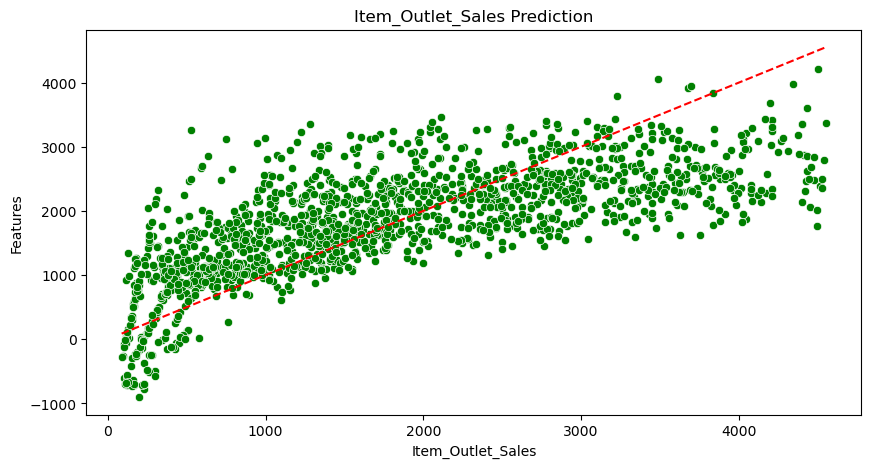

In [54]:
# visualize it
plt.figure(figsize= (10,5))
sns.scatterplot(x = y_test, y = y_pred, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color = "red")
plt.ylabel("Features")
plt.title("Item_Outlet_Sales Prediction");

In [55]:
# Regressor coefficients and intercept
print(f'Coefficient: {LR_regressor.coef_}')
print()
print()
print(f'Intercept: {LR_regressor.intercept_}')

Coefficient: [-2.86723308e+00  7.41844245e+00  6.24508372e+02  1.07591856e+02
  1.07591856e+02 -2.90088525e+01 -4.22219020e+00 -3.92177943e-01
 -6.13746997e+00  5.14000371e+00 -1.64123106e+01  6.33089883e+00
 -2.32577713e+01 -1.93155680e+01 -1.19069900e+01  1.63809871e+01
  1.98162312e+00 -1.19084006e+00 -6.16465799e+00 -4.19639206e+00
  2.50864861e+00 -9.06876680e-01 -1.37029176e+01  1.07453194e+01
 -3.34471514e+02 -2.84684030e+02 -6.08530301e+01 -1.52036991e+02
  6.80890827e+02  3.98889786e+02  8.21927493e+02]


Intercept: 1799.2737614104497


In [56]:
#Scaling the variance to one
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LR_regressor)

model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

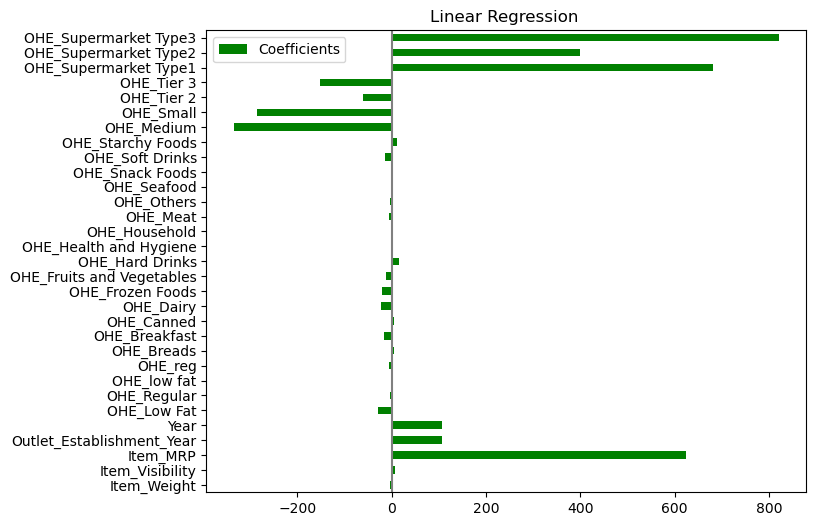

In [57]:
coefs = pd.DataFrame(
    model[1].coef_, columns=["Coefficients"], index=x.columns
)

coefs.plot(kind="barh", figsize=(10, 6), color="green")
plt.title("Linear Regression ")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)